# "Исследование факторов, влияющих на продажи компьютерных игр. Прогноз на 2017 г." <a class="tocSkip">

## Цель исследования
<div style="border: ridge black 3px; padding: 25px">
<b>Целью данного исследования является изучение и выявление факторов, влияющих на успешность (высокие продажи) компьютерных игр</b>, которые смогут помочь руководству интернет-магазина компьютерных игр "Стримчик" (продажи по всему миру), выявить потенциально популярный продукт на 2017 г. и спланировать рекламные кампании.<br><br>
    
Для исследования у нас имеются данные из открытых источников (до 2016 г.) о продажах игр, оценках пользователей, экспертов, о жанрах и платформах.<br><br>
    
Мы произведем предобработку исходного датафрейма, проведем исследовательский анализ, изучим предпочтения пользователей по регионам, проверим гипотезы и в конце исследования сформулируем общий вывод.
    
</div>

## Описание исходных данных
**Ниже представлено описание всей доступной нам информации по исходному датафрейму:**

Путь к файлу: /datasets/games.csv
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Примечание:** данные за 2016 год могут быть неполными.


**Первое, что нам следует сразу изменить после открытия данных - привести в единый регистр наименования столбцов. А также скорректируем некоторые названия столбцов до более точной формулировки, дополнив их.**

## Открытие данных

In [1]:
# сразу на данном этапе импортируем основные нужные библиотеки для будущих манипуляций

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
# приводим названия столбцов к одному регистру и переименуем некоторые из столбцов 

games_data.columns = games_data.columns.str.lower()
games_data = games_data.rename({'name': 'game_name', 'platform': 'game_platform', 'genre': 'game_genre', \
                                'critic_score': 'critic_rating', 'user_score': 'user_rating', 'rating': 'esrb_rating'}, \
                                axis = 'columns')

Откроем теперь таблицу: выведем первые 15 строк для ознакомления с содержимым, выведем общую информацию.

In [4]:
display(games_data.head(15))
display(games_data.info())

,game_name,game_platform,year_of_release,game_genre,na_sales,eu_sales,jp_sales,other_sales,critic_rating,user_rating,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
game_platform      16715 non-null object
year_of_release    16446 non-null float64
game_genre         16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_rating      8137 non-null float64
user_rating        10014 non-null object
esrb_rating        9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Посмотрим на пропуски, их количество с указанием %. Создадим функцию.

In [5]:
def show_nan(df):
    '''
    Функция для просмотра кол-ва пропусков и % пропусков по конкретному датафрейму df
    '''
    nan_report = pd.DataFrame([df.isna().sum(), df.isna().count(), df.isna().mean()]).T
    nan_report.columns = ['Кол-во пропусков', 'Всего', '% пропусков']
    nan_report = nan_report \
    .sort_values(by = 'Кол-во пропусков', ascending = False) \
    .style.format({'Количество пропусков': '{:.0f}', 'Всего': '{:.0f}', '% пропусков': '{:.2%}'})
    print('------------------------------------------------')
    print('Таблица "Информация о пропусках"')
    display(nan_report)

In [6]:
# запустим функцию по исходному датафрейму `games_data`

show_nan(games_data)

------------------------------------------------
Таблица "Информация о пропусках"


,Кол-во пропусков,Всего,% пропусков
critic_rating,8578,16715,51.32%
esrb_rating,6766,16715,40.48%
user_rating,6701,16715,40.09%
year_of_release,269,16715,1.61%
game_name,2,16715,0.01%
game_genre,2,16715,0.01%
game_platform,0,16715,0.00%
na_sales,0,16715,0.00%
eu_sales,0,16715,0.00%
jp_sales,0,16715,0.00%


**Мы видим, что:**
1. Таблица состоит из 16715 строк (наблюдений), в которой большая часть пропусков (почти половина) приходится на столбцы с рейтингами (критиков, пользователей или организации ESRB).
 1. Пропуски в столбцах `critic_rating` и `user_rating` мы не будем заполнять, поскольку заполнение по любому признаку может сильно исказить результат, т.к. таких пропусков почти половина.
 2. Пропуски в столбце `esrb_rating`, где указывается возрастная категория будет иметь значение в нашем анализе и 40% пропусков критичный показатель, но поскольку столбец типа `object` мы можем заполнить пропуски строчным значением *'not_defined' (не определено)*. Данные пропуски в рейтингах, как и в случае пропусков `critic_rating` и `user_rating`можно объяснить как банальное отсутствие информации. Рейтинг ESRB присваивается в случае запроса от самого разработчика игр. Если нет запроса нет и рейтинга. Критики и пользователи также могли не оставлять свои оценки.
2. 0.01% и 1.61% - % пропусков в столбцах `game_name`, `game_genre`, `year_of_release`. Значения категориальные и поскольку они неизвестны нам и таких пропусков мало - удалим их.

Для корректных будущих манипуляций **изменим тип данных** некоторых из столбцов на следующий:
1. Столбец `year_of_release`: из `float` переведем в `int` (номер года не может быть плавающим значением).
2. Столбец `user_rating`: из `object` переведем в `float` (значения рейтинга имеют плавающие значения по визуальному просмотру и это нам подходит для анализа в отличии от `object`).

Столбцы с объёмами продаж оставим в типе `float`: округление в большую сторону (или просто округление) может также повлиять на анализ и исказить финальный результат.

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы:<br><br>
- Ознакомились с исходным датафреймом: добавили корректировки в названия некоторых столбцов, оценили заполненность и тип данных.<br>
- Обнаружили некритичные пропуски, некоторые из которых заполним - `esrb_rating`, а пропуски в `game_name`, `game_genre`, `year_of_release` удалим.<br>
- Описали необходимые изменения типов данных, которые нужно будет внести.<br><br>

Приступим непосредственно к предобработке данных.
</div>

## Предобработка данных

### Обработка пропусков

In [7]:
# удалим все строки с пропусками в столбцах `game_name`, `game_genre`, `year_of_release`

games_data = games_data.dropna(subset=['game_name'])
games_data = games_data.dropna(subset=['game_genre'])
games_data = games_data.dropna(subset=['year_of_release'])

# пропуски в `esrb_rating` заполним значением 'not_defined'

games_data['esrb_rating'] = games_data['esrb_rating'].fillna('not_defined')

In [8]:
# отобразим для нашего понимания все уникальные значения в столбце `esrb_rating` и пропишем их расшифровку

games_data['esrb_rating'].unique()

array(['E', 'not_defined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

- **Е** («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
- **M** («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- **T** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
- **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше».
- **K-A** («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше. Первоначально "K-A" ("Kids to Adults").
- **AO** («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- **EC** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше.
- **RP** («Rating Pending») — «Рейтинг ожидается».

Как мы видим, аббревиатуру **K-A** стоит заменить на **E**, поскольку это одно и то же ("K-A" - первоначальное, но уже устаревшее название "E").
Рейтинги **M** и **AO** также имеют схожий смысл, но согласно расшифровкам ESRB из открытых данных ни одно из них не устаревшее название, а отдельные рейтинги. Оставим без замены.

Также проверим столбец `game_platform` на уникальные значения названий платформ и возможные дубликаты из-за разного регистра.

In [9]:
games_data['game_platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Явных дубликатов наименований платформ не обнаружено.

In [10]:
# в столбце 'esrb_rating' заменяем значения "K-A" на "E"

games_data['esrb_rating'] = games_data['esrb_rating'].replace('K-A', 'E')

# проверим наши данные на грубые дубликаты и оставшийся % пропусков

print('Количество найденных дубликатов =', games_data.duplicated().sum())
print()
show_nan(games_data)

Количество найденных дубликатов = 0

------------------------------------------------
Таблица "Информация о пропусках"


,Кол-во пропусков,Всего,% пропусков
critic_rating,8461,16444,51.45%
user_rating,6605,16444,40.17%
game_name,0,16444,0.00%
game_platform,0,16444,0.00%
year_of_release,0,16444,0.00%
game_genre,0,16444,0.00%
na_sales,0,16444,0.00%
eu_sales,0,16444,0.00%
jp_sales,0,16444,0.00%
other_sales,0,16444,0.00%


Как мы указывали выше, пропуски в `critic_rating` и `user_rating` мы не заполняем, поскольку заполнение по любому признаку может сильно исказить финальные результаты анализа.

### Изменение типов данных

Стоит отметить, что столбец `user_rating` имеет тип `object`. Возможно это из-за того, что он содержит буквенные значения (хотя в описании, п.2, возможный рейтинг пользователя в диапазоне от 0 до 10 (баллов)). Проверим какие уникальные значения он содержит.

In [11]:
games_data['user_rating'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
print('Кол-во значений "tbd" =', len(games_data.query('user_rating == "tbd"')))

Кол-во значений "tbd" = 2376


Значение *'tbd'* с англ. можно расшифровать как *To Be Determined (будет определено)* или *To Be Decided (будет решено)*. Это часто встречающиеся варианты перевода. Возможно пользователь отложил проставление рейтинга, но так и не сделал это. 
Поэтому мы делаем вывод, что это аналогично как если бы оно не было ничем заполнено, т.е. NaN. 

Изменим тип данных, учитывая обнаруженное значение 'tbd', которое заменим на NaN (автоматически) при измении типа данных.

In [13]:
# изменяем столбец `year_of_release` на целочисленный тип данных `int`
# и столбец `user_rating` на тип `float`

games_data['year_of_release'] = games_data['year_of_release'].astype('int')
games_data['user_rating'] = pd.to_numeric(games_data['user_rating'], errors='coerce') # в случае столкновения со значениями 
                                                                                      # "tbd" `coerce` сам заменит их на NaN

### Добавление нового столбца: суммарные продажи

Создадим новый столбец `total_sales`, в котором посчитаем суммарные продажи во всех регионах (из доступных нам) по всем играм, представленным в нашем датафрейме (*без* группировки по названию игры, т.к. одна и та же игра могла выходить в разные годы на разных платформах и это будут разные показатели).

In [14]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

# смотрим результат

games_data.head()

,game_name,game_platform,year_of_release,game_genre,na_sales,eu_sales,jp_sales,other_sales,critic_rating,user_rating,esrb_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_defined,31.38


### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы:<br><br>
- Обработали пропуски в столбцах `game_name`, `game_genre`, `year_of_release`, `esrb_rating`.<br>
- Обнаружили устаревшую аббревиатуру рейтинга в столбце `esrb_rating`  - `"К-А"`, которую заменили на `"Е"`.<br>
- Обнаружили и обработали значения `"tbd"` в столбце `user_rating`.<br>
- Изменили тип данных в столбцах `user_rating` и `year_of_release`.<br><br>

Приступим непосредственно к исследовательскому анализу.
</div>

## Исследовательский анализ данных

### Изучение количества игр, выпущенных в разные годы

**Посчитаем сколько игр выпускалось в разные годы.**

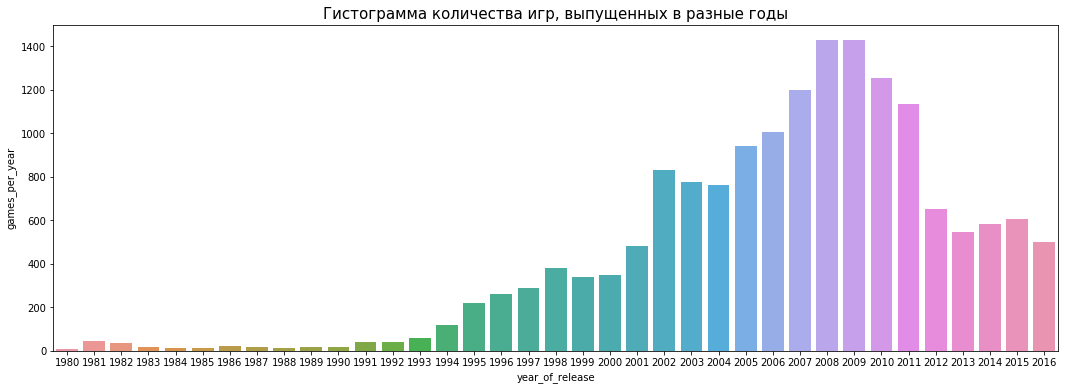

In [15]:
# для подсчета сформируем сводную таблицу кол-ва игр по годам

games_per_year = games_data.pivot_table(index='year_of_release', values='game_name', aggfunc='count').reset_index()
games_per_year.columns = ['year_of_release', 'games_per_year']

# и построим гистограмму для визуального анализа полученной сводной таблицы

plt.figure(figsize=(18,6))
sns.barplot(data=games_per_year, x='year_of_release', y='games_per_year')
plt.title('Гистограмма количества игр, выпущенных в разные годы', fontsize=15)  
plt.show()

<div style="border:dotted black 3px; padding: 20px">
    
1. Как мы видим, начиная уже с 1994 г., 1995 г. и далее - начался рост выпуска игр.<br>
2. Самые пиковые годы по выпуску игр - 2008 г. и 2009 г. И уже с 2010 г. началось снижение выпуска игр.<br><br>

Для нашего анализа период с 1980 г. по 1993 г. по кол-ву игр малочисленный и его можно будет далее отсечь и точно не рассматривать.
    
</div>

### Изучение самых популярных платформ

**Вычислим какие из платформ за все годы (с 1980 г. по 2016 г.) оказались самыми прибыльными (популярными). Определим суммарные продажи по каждой из платформ.**

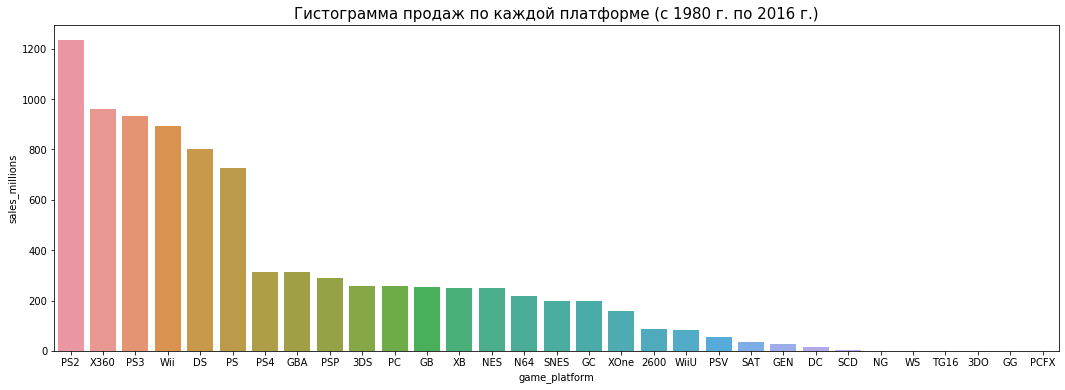

In [16]:
# создаем сводную таблицу: для каждой платформы считаем сумму продаж всех игр

sales_by_platform = games_data.pivot_table(index='game_platform', values='total_sales', aggfunc='sum') \
.sort_values(by='total_sales', ascending=False).reset_index()      # для удобства отсортируем по убыванию кол-ва продаж 
sales_by_platform.columns = ['game_platform', 'sales_millions']

# и построим гистограмму для визуального анализа полученной сводной таблицы

plt.figure(figsize=(18,6))
sns.barplot(data=sales_by_platform , x='game_platform', y='sales_millions')
plt.title('Гистограмма продаж по каждой платформе (с 1980 г. по 2016 г.)', fontsize=15)  
plt.show()

Очень заметен резкий переход по кол-ву продаж, где выделяются **6 платформ-лидеров** по объему продаж, это: **PS2, X360, PS3, Wii, DS, PS.**

Построим график распределения продаж данных 6 платформ по годам.
Рассмотрим для детализации период с 1998 г. по 2016 г.

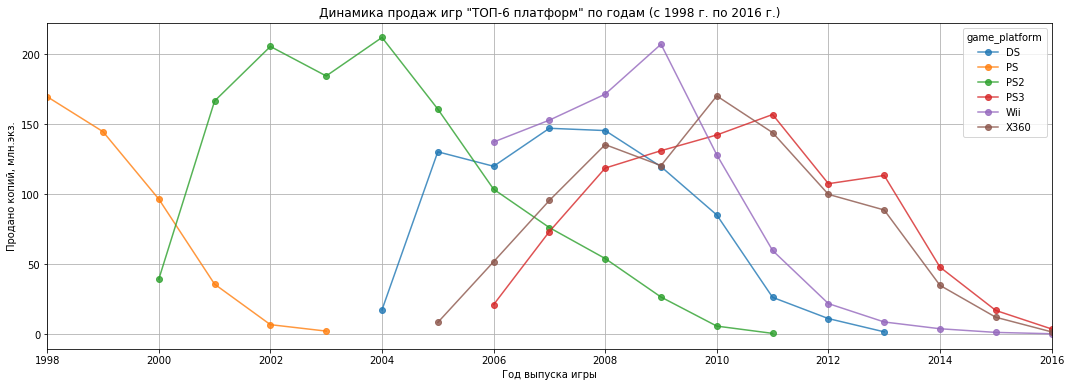

In [17]:
# создадим срез с этими 6 платформами

top6_platforms = \
games_data.query('game_platform == "PS2" or game_platform == "X360" or game_platform == "PS3" or game_platform == "Wii" \
or game_platform == "DS" or game_platform == "PS"') 

# на основании этого среза создадим сводную таблицу, где подсчитаем для каждой платформы в каждом году общее кол-во продаж 
# и далее построим линейный график

top6_platforms_sales_per_years = \
top6_platforms \
.pivot_table(index = 'year_of_release', columns = 'game_platform', values = 'total_sales', aggfunc = 'sum') \
.plot(figsize = (18,6), style='o-', legend = True, grid = True, alpha = 0.8, \
title='Динамика продаж игр "ТОП-6 платформ" по годам (с 1998 г. по 2016 г.)', xlim=(1998, 2016)) \
.set(xlabel = 'Год выпуска игры', ylabel = 'Продано копий, млн.экз.')

<div style="border:dotted black 3px; padding: 20px">
    
По графику отслеживается, что в среднем период жизни популярной платформы составляет <b>10-11 лет</b>, из которых наиболее пиковые по объёму продаж только <b>5-6 лет</b> (т.е. половина жизненного цикла платформы).<br><br>

Рассмотрим теперь и все остальные платформы, которые не попали в список самых продаваемых. Определим какой в среднем жизненный цикл у всех платформ.
    
</div>

In [18]:
# посчитаем кол-во лет для каждой платформы и затем посмотрим на числовое описание данных

platform_vitality = games_data.groupby('game_platform')['year_of_release'].nunique()
platform_vitality.describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Медианный и средний жизненный цикл всех платформ практически одинаков (7; 7.6 лет). Поэтому можно сделать вывод, что в среднем платформа живет 7 лет, но как показал анализ среди популярных платформ только половина от этого срока, т.е. 3,5 года - срок успешных и пиковых продаж. Посмотрим, что это за платформа-долгожитель со сроком 26 лет.

In [19]:
platform_vitality 

game_platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

Платформа *PC* - самая долгоживущая (что соответствует действительности), но далеко не самая прибыльная по продажам игр.

### Определение актуального периода

<div style="border:dotted black 3px; padding: 20px">
    
<b>Для эффективного решения поставленной перед нами задачи по прогнозированию успешных игровых закономерностей на 2017 г. выделим актуальный период, в течении которого платформа имеет хорошие показатели продаж.</b><br><br>
      
Поскольку данные за 2016 г. из исходной информации у нас неполные, для определения актуального периода будем учитывать ещё +1 год. Как мы выяснили - средний жизненный цикл платформы составляет 7 лет и как показал детальный график на примере ТОП-6 популярных платформ - только половина из этого периода (т.е. 3,5 года) успешна по продажам. Округлим до 4 и прибавим еще 1 год (из-за неполных данных). Итого: для анализа будем считать актуальным <b>период в 5 лет: с 2012 г. по 2016 г.</b><br><br>

Создадим обновленный датафрейм `games_data_actual`, учитывая новый параметр.
    
</div>

In [20]:
games_data_actual = games_data.query('year_of_release >= 2012')

### Изучение продаж по платформам (2012 г. - 2016 г.)

**Определим какие платформы лидируют по продажам, какие растут или падают. 
На основе сводной таблицы построим линейный график продаж и выведем итоговые суммы по каждой платформе за период с 2012 г. по 2016 г.**

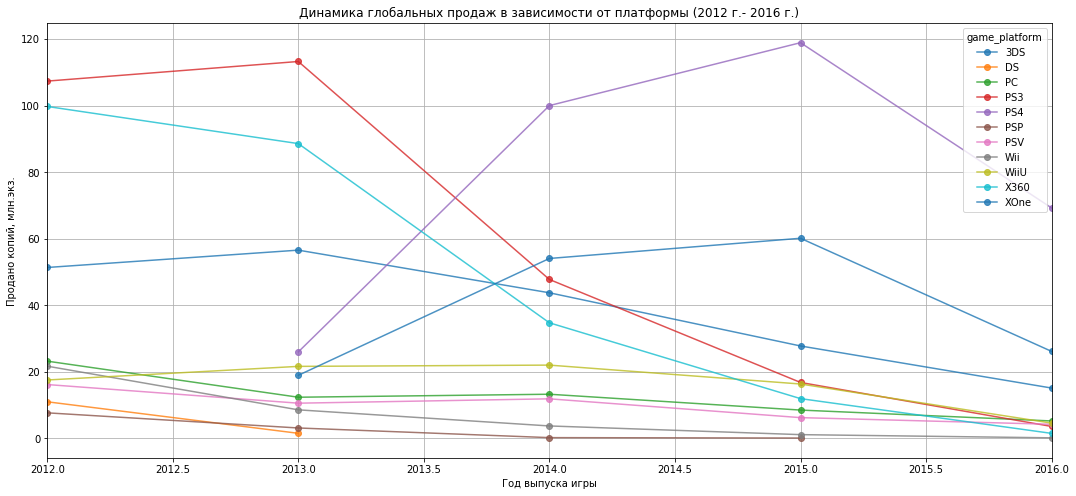

----------------------------------------------------------------------------------------------------------------------
Рейтинг прибыльных платформ (2012 г.- 2016 г.), глобальные продажи (млн.экз.)


,game_platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [21]:
games_data_actual \
.pivot_table(index = 'year_of_release', columns = 'game_platform', values = 'total_sales', aggfunc = 'sum') \
.plot(figsize = (18,8), style='o-', legend = True, grid = True, alpha = 0.8, \
title='Динамика глобальных продаж в зависимости от платформы (2012 г.- 2016 г.)') \
.set(xlabel = 'Год выпуска игры', ylabel = 'Продано копий, млн.экз.')
plt.show()

print('----------------------------------------------------------------------------------------------------------------------')
print('Рейтинг прибыльных платформ (2012 г.- 2016 г.), глобальные продажи (млн.экз.)')
games_data_actual.pivot_table(index = 'game_platform', values = 'total_sales', aggfunc = 'sum') \
.sort_values(by='total_sales', ascending=False).reset_index()

По данному графику за рассматриваемый период 2012 г. - 2016 г. мы видим следующее:
- Платформы *PS4* и *XOne* имеют тенденцию к росту продаж.
- У платформ *PS3, X360, 3DS* наблюдается спад продаж.

В ТОП-5 лидеров продаж входят платформы (по убыванию продаж): *PS4, PS3, X360, 3DS, XOne.* У остальных платформ не наблюдается тенденций к резкому росту или падению продаж.

<div style="border:dotted black 3px; padding: 20px">
    
На данном этапе, резюмируя вышесказанное, можно выделить следующие особенности:<br><br>
- Перспективные платформы с хорошим объемом продаж и тенденцией к росту: PS4, XOne.<br>
- Платформы с хорошим объемом продаж, но тенденцией на спад продаж: PS3, X360, 3DS.<br>
    
</div>

### Изучение распределения продаж по платформам (2012 г. - 2016 г.)

**Построим диаграмму размаха по продажам игр (во всех регионах) в разбивке по платформам. А также посчитаем, сгруппировав по платформе среднее значение показателя продаж, медианное значение и стандартное отклонение.**

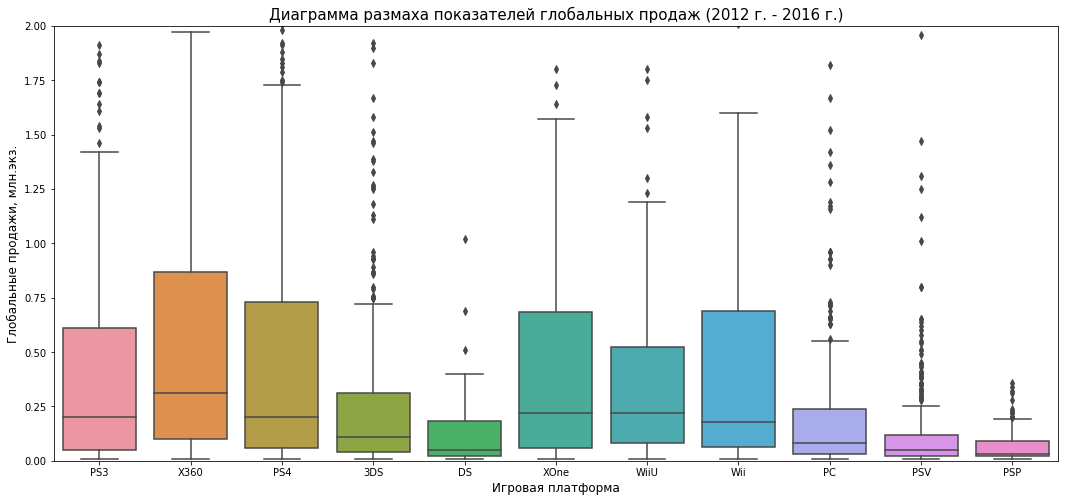

In [22]:
plt.figure(figsize=(18,8))
sns.boxplot(data=games_data_actual, x='game_platform', y='total_sales').set_ylim(0, 2)   # ограничим ось 'y' до 2 млн.
plt.title('Диаграмма размаха показателей глобальных продаж (2012 г. - 2016 г.)', fontsize=15)
plt.xlabel('Игровая платформа', fontsize=12)
plt.ylabel('Глобальные продажи, млн.экз.',fontsize=12)
plt.show()

In [23]:
print('Таблица "Среднее, медианное значение и стандартное отклонение (2012 г. - 2016 г.)"')
display(games_data_actual.groupby('game_platform').agg({'total_sales': ['mean', 'median', 'std']}).round(2))

Таблица "Среднее, медианное значение и стандартное отклонение (2012 г. - 2016 г.)"


total_sales             
                     mean median   std
game_platform                         
3DS                  0.49   0.11  1.39
DS                   0.40   0.05  1.44
PC                   0.25   0.08  0.49
PS3                  0.59   0.20  1.46
PS4                  0.80   0.20  1.61
PSP                  0.06   0.03  0.07
PSV                  0.12   0.05  0.20
Wii                  0.65   0.18  1.17
WiiU                 0.56   0.22  1.06
X360                 0.81   0.31  1.71
XOne                 0.65   0.22  1.04

<div style="border:dotted black 3px; padding: 20px">
    
Видим следующее:<br>
- Выделяются по размаху продаж 6 платформ: PS3, X360, PS4, XOne, WiiU, Wii.<br><br>

Несмотря на маленькие объемы продаж у WiiU, Wii (которые мы определили ранее, по сравнению PS3, X360, PS4, XOne) - данные платформы WiiU, Wii имеют хороший размах значений продаж и медианный показатель продаж сопоставимый с обозначенной 6-кой лидеров: PS3, X360, PS4, XOne, WiiU, Wii.<br>
Стандартное отклонение больше всего у лидирующих платформ X360, PS4 и PS3.    
    
</div>

### Изучение влияния оценок пользователей и экспертов на продажи (2012 г. - 2016 г.)

**Изучим есть ли корреляция между отзывами пользователей и общим количеством продаж. И есть ли корреляция между отзывами экспертов (критиков) и общим количеством продаж.**

Создадим срез с 6 популярными платформами `games_data_top_platforms`, которые из анализа выше мы определили как прибыльные и перспективные, (но включим и популярные платформы с тенденцией на спад продаж PS3, X360). Построим на основании этого среза диаграммы рассеяния и посчитаем корреляцию по каждой платформе отдельно.

In [24]:
# создаем срез с 6 популярными платформами

games_data_top_platforms = games_data_actual.query('game_platform == "PS4" or game_platform == "PS3" or \
game_platform == "X360" or game_platform == "XOne" or game_platform == "WiiU" or game_platform == "Wii"')

Создадим функцию `show_scatterplot_by_rating(game_platform)`, которая в зависимости от названия платформы построит 2 диаграммы рассеяния: 
- 1-ю - в зависимости от отзывов пользователей; 
- 2-ю - в зависимости от отзывов критиков. 

А также добавим в нее расчёт корреляции и вывод на экран.

In [25]:
def show_scatterplot_by_rating(game_platform):
    
    # поместим в датафрейм `scatterplot_data` 3 нужных нам столбца по той платформе, которую будем указывать при вызове функции
    
    scatterplot_data = games_data_top_platforms[(games_data_top_platforms['game_platform'] == game_platform)][['total_sales',\
    'critic_rating', 'user_rating']]
    
    # строим 1-ю диаграмму зависимости продаж от отзывов критиков `critic_plot`
    
    critic_plot= scatterplot_data.plot(kind = 'scatter', x='critic_rating', y='total_sales', figsize=(15,5), \
    legend=True, grid=True, alpha=0.5, title='Платформа {}. Диаграмма рассеяния продаж и отзывов критиков' \
    .format(game_platform), color='blue').set(xlabel = 'Оценка критиков', ylabel = 'Продано копий, млн.экз.')
    
    # строим 2-ю диаграмму зависимости продаж от отзывов пользоваталей `user_plot`
    
    user_plot = scatterplot_data.plot(kind = 'scatter', x='user_rating', y='total_sales', figsize=(15,5), \
    legend=True, grid=True, alpha=0.5, title='Платформа {}. Диаграмма рассеяния продаж и отзывов пользователей' \
    .format(game_platform), color='green').set(xlabel = 'Оценка пользователей', ylabel = 'Продано копий, млн.экз.')
    plt.show()
    
    # считаем корреляцию и выводим на экран результат, округляя до 3-х знаков после ','
    
    critic_corr = scatterplot_data['critic_rating'].corr(scatterplot_data['total_sales'])
    user_corr = scatterplot_data['user_rating'].corr(scatterplot_data['total_sales'])
    print('Коэффициент корреляции между продажами и отзывами критиков =', critic_corr.round(3))
    print('Коэффициент корреляции между продажами и отзывами пользователей =', user_corr.round(3))
    print('-----------------------------------------------------------------------------------------------------------------')

Построим диаграммы рассеяния и определим корреляцию на примере одной из самых популярных платформ *PS4*.

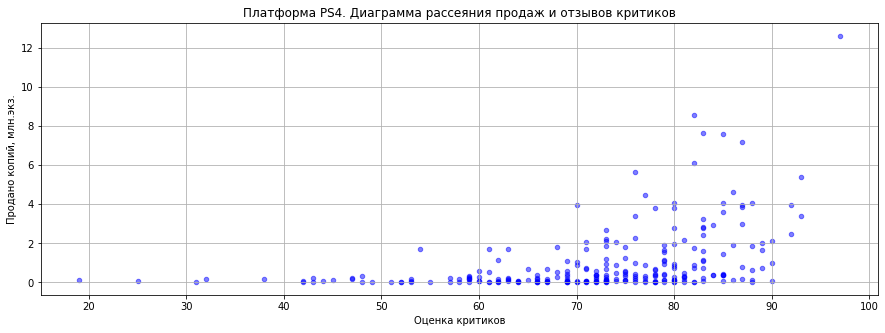

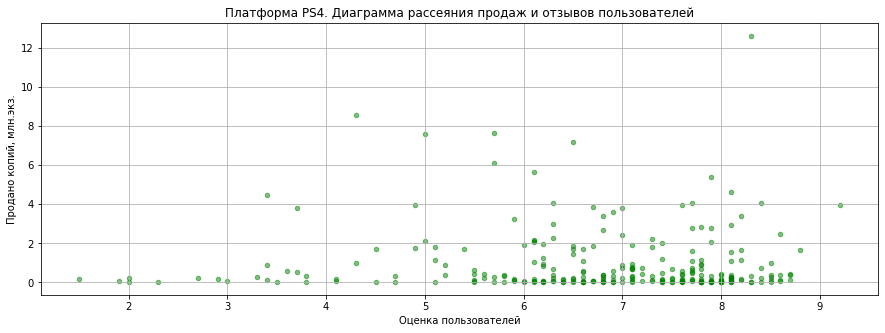

Коэффициент корреляции между продажами и отзывами критиков = 0.407
Коэффициент корреляции между продажами и отзывами пользователей = -0.032
-----------------------------------------------------------------------------------------------------------------


In [26]:
show_scatterplot_by_rating('PS4')

<div style="border:dotted black 3px; padding: 20px">
    
Видим, что для платформы <i>PS4</i> существует небольшая корреляция между отзывами критиков и объемами продаж: чем больше оценка критиков, тем наблюдаются бОльшие продажи, чего нельзя сказать про отзывы от пользователей.<br><br>

Здесь корреляция отсутствует, и даже при плохих оценках пользователей можно наблюдать высокие продажи, как если бы это была высокая оценка критиков.<br>
    
</div>

Посмотрим на всех ли платформах такая ситуация. Рассмотрим поочередно платформы *PS3, X360, XOne, WiiU, Wii.*

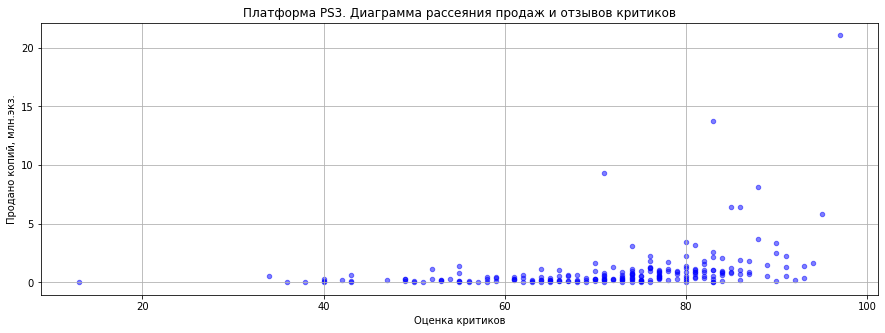

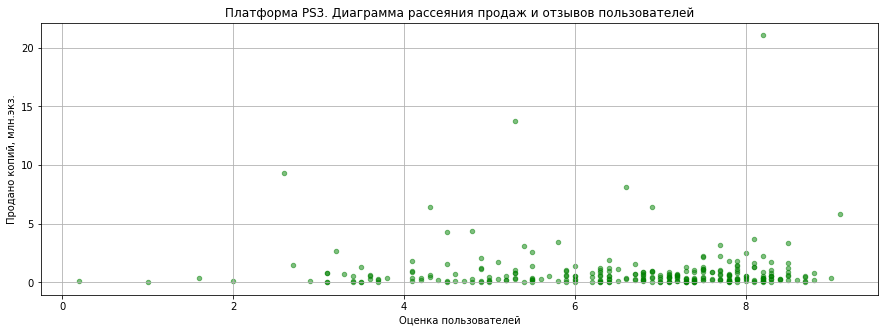

Коэффициент корреляции между продажами и отзывами критиков = 0.331
Коэффициент корреляции между продажами и отзывами пользователей = -0.005
-----------------------------------------------------------------------------------------------------------------


In [27]:
show_scatterplot_by_rating('PS3')

<div style="border:dotted black 3px; padding: 20px">
    
У платформы <i>PS3</i> уже не такая сильная корреляция продаж от отзывов критиков как у <i>PS4</i>, всего 0,331. Корреляция продаж и отзывов пользователей также отсутствует.   
    
</div>

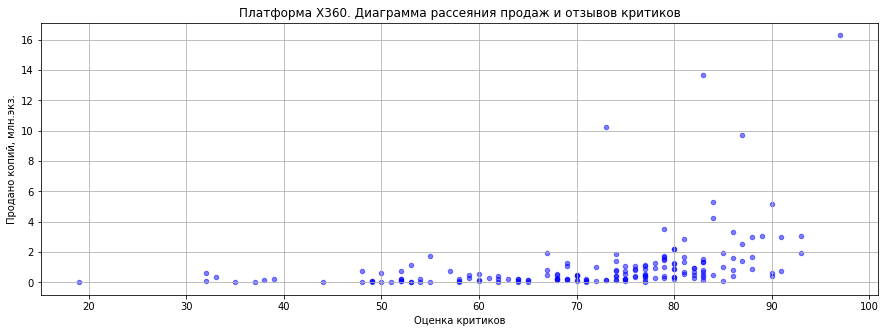

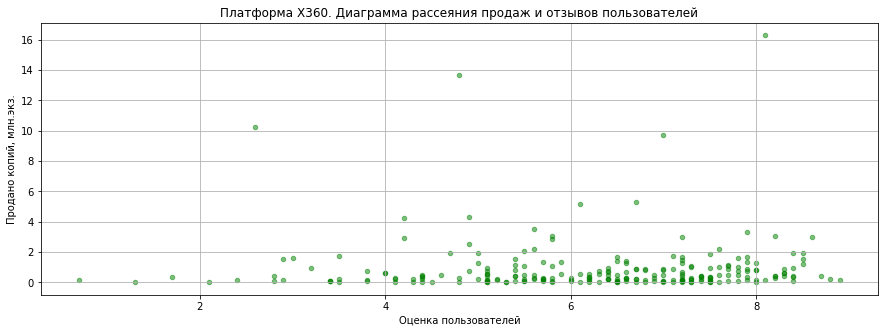

Коэффициент корреляции между продажами и отзывами критиков = 0.361
Коэффициент корреляции между продажами и отзывами пользователей = 0.006
-----------------------------------------------------------------------------------------------------------------


In [28]:
# рассмотрим следующую платформу X360

show_scatterplot_by_rating('X360')

<div style="border:dotted black 3px; padding: 20px">
    
Корреляция продаж <i>X360</i> и отзывов критиков небольшая, и сравнима с корреляцией <i>PS3</i>.  Корреляция продаж и отзывов пользователей также отсутствует.   
    
</div>

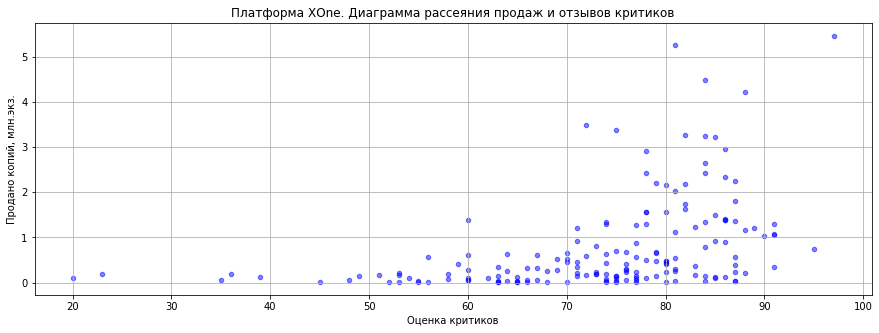

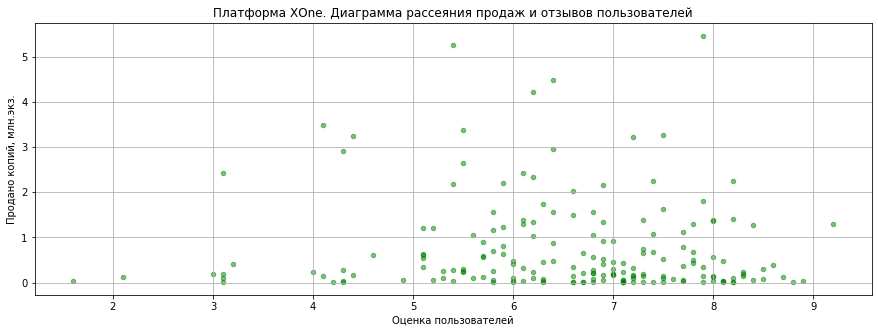

Коэффициент корреляции между продажами и отзывами критиков = 0.417
Коэффициент корреляции между продажами и отзывами пользователей = -0.069
-----------------------------------------------------------------------------------------------------------------


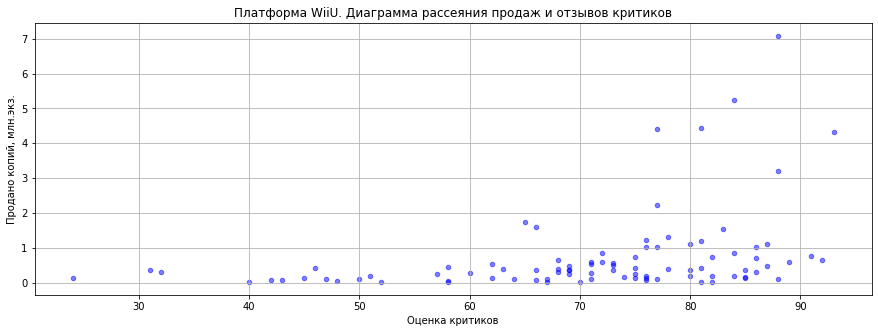

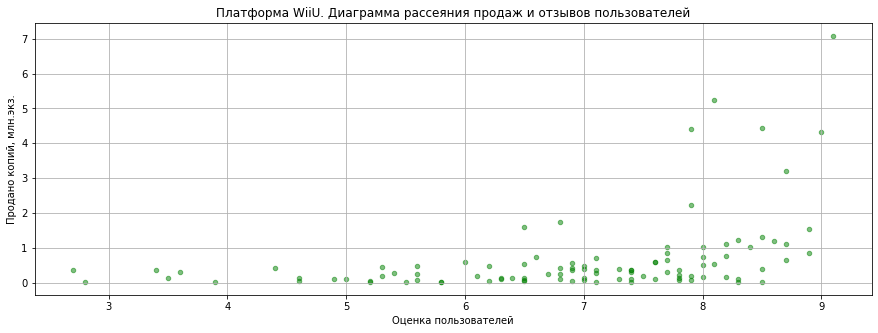

Коэффициент корреляции между продажами и отзывами критиков = 0.348
Коэффициент корреляции между продажами и отзывами пользователей = 0.4
-----------------------------------------------------------------------------------------------------------------


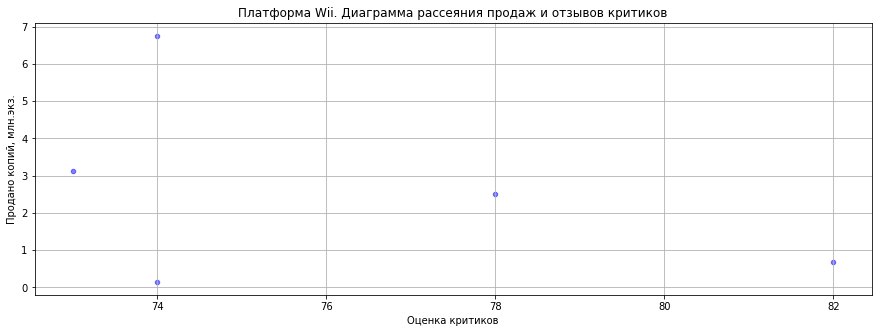

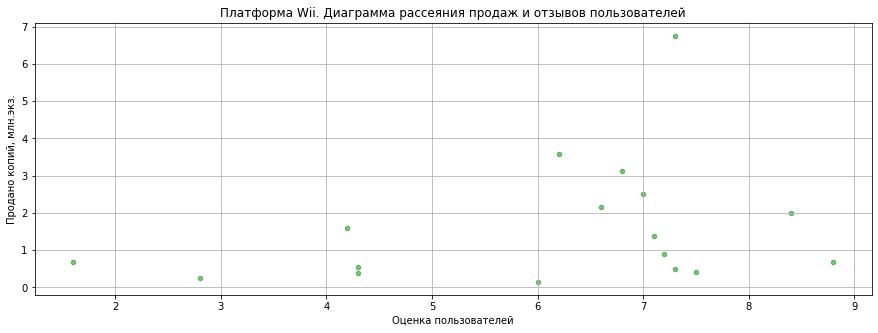

Коэффициент корреляции между продажами и отзывами критиков = -0.424
Коэффициент корреляции между продажами и отзывами пользователей = 0.296
-----------------------------------------------------------------------------------------------------------------


In [29]:
# и оставшиеся 3 платформы: XOne, WiiU, Wii

show_scatterplot_by_rating('XOne')
show_scatterplot_by_rating('WiiU')
show_scatterplot_by_rating('Wii')

<div style="border:dotted black 3px; padding: 20px">
    
- <i>XOne</i>: есть корреляция продаж и отзывов критиков (сравнима с корреляцией этих же значений у <i>PS4</i>). Корреляция продаж и отзывов пользователей также отсутствует.<br>
    
- <i>WiiU</i>: есть небольшая корреляция продаж и отзывов критиков (сравнима с корреляцией этих же значений у <i>PS3, X360</i>). В отличии от остальных платформ - есть корреляция продаж и отзывов пользователей.<br>
    
- <i>Wii</i>: судя по диаграмме очень мало в данных оценок от критиков по данной платформе, корреляция получилась отрицательная: чем ниже оценка, тем выше продажи. По такой маленькой выборке получившийся результат может быть не совсем корректным. Также наблюдается небольшая корреляция продаж и отзывов пользователей.<br>
    
</div>

### Изучение распределения игр по жанрам (2012 г. - 2016 г.)

**Посмотрим игр каких жанров больше всего представлено в наших данных, а так же какие из этих жанров самые прибыльные и, наоборот, с самыми низкими продажами.**

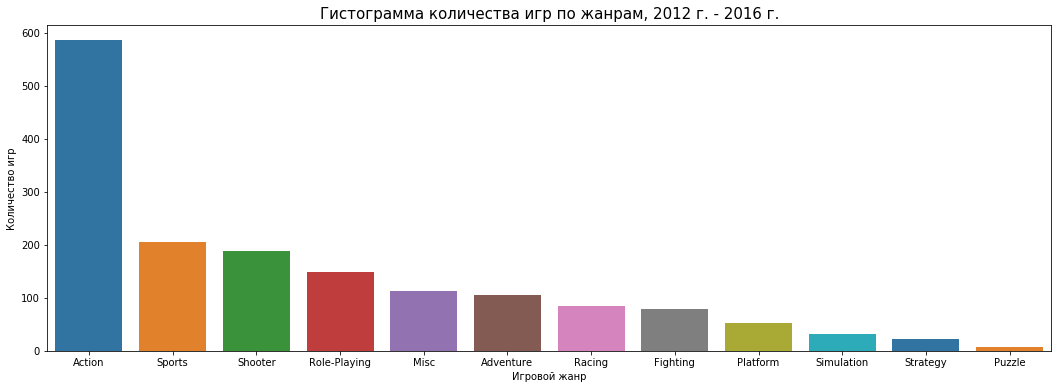

In [30]:
# строим гистограмму кол-ва игр по жанрам на основании сводной таблицы

genres_count = games_data_top_platforms.pivot_table(index='game_genre', values='game_name', aggfunc='count') \
.sort_values(by='game_name', ascending=False).reset_index()
genres_count.columns = ['Игровой жанр', 'Количество игр']

plt.figure(figsize=(18,6))
sns.barplot(data=genres_count, x='Игровой жанр', y='Количество игр', palette="tab10")
plt.title('Гистограмма количества игр по жанрам, 2012 г. - 2016 г.', fontsize=15)  
plt.show()

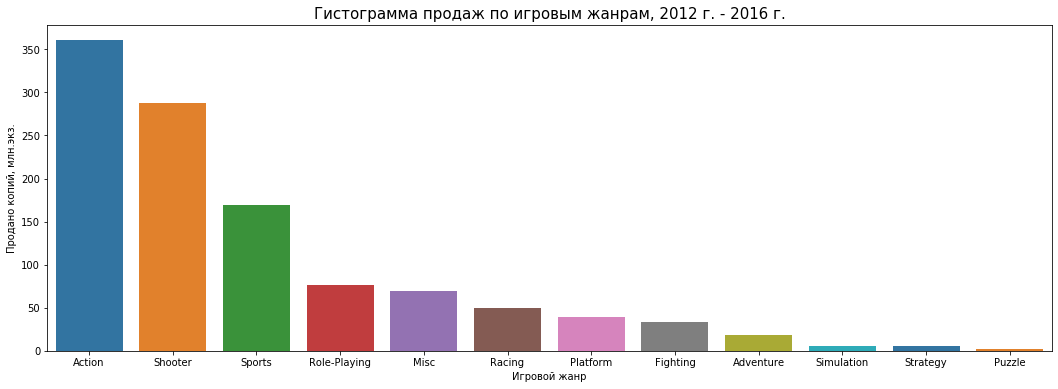

In [31]:
# создаем сводную таблицу: для каждого жанра считаем сумму продаж игр в этом жанре

sales_by_genre = games_data_top_platforms.pivot_table(index='game_genre', values='total_sales', aggfunc='sum') \
.sort_values(by='total_sales', ascending=False).reset_index()      # для удобства отсортируем по убыванию кол-ва продаж 
sales_by_genre.columns = ['Игровой жанр', 'Продано копий, млн.экз.']

# и строим гистограмму для визуального анализа полученной сводной таблицы

plt.figure(figsize=(18,6))
sns.barplot(data=sales_by_genre, x='Игровой жанр', y='Продано копий, млн.экз.', palette="tab10")
plt.title('Гистограмма продаж по игровым жанрам, 2012 г. - 2016 г.', fontsize=15)  
plt.show()

<div style="border:dotted black 3px; padding: 20px">
    
Явный жанр-лидер по количеству игр в данном жанре - жанр <i>Action</i> (почти втрое больше идущих следом жанров <i>Sports</i> и <i>Shooter</i>).<br><br>

По объему продаж игр выделяются 3 жанра-лидера (по убыванию проданных игр): <i>Action, Shooter, Sports</i>. Стоит отметить, что несмотря на то, что  жанр <i>Shooter</i> представлен по кол-ву игр втрое меньше жанра <i>Action</i> - его прибыльность немногим уступает жанру <i>Action</i>.<br><br>

Самые низкодоходные жанры: <i>Puzzle, Strategy, Simulation</i>.   
    
</div>

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы произвели исследовательский анализ по различным факторам и выявили следующее:<br><br>
- Жизненный цикл популярной платформы составляет **10-11 лет**, из которых наиболее пиковые по объёму продаж только <b>5-6 лет</b>.<br>
- <b>Выделили период с 2012 г. по 2016 г. как актуальный</b> для анализа, в течении которого платформа имеет хорошие показатели продаж.<br><br>
    
    На основании этого периода выявили, что:<br><br>
    
- Платформы <i>PS4 и XOne</i> имеют тенденцию к росту продаж.<br>
- У платформ <i>PS3, X360, 3DS</i> наблюдается тенденция к спаду продаж.<br>
- Выделили ТОП-6 популярных платформ с хорошими объемами и размахом продаж: <i>PS3, X360, PS4, XOne, WiiU, Wii.</i><br>
- У всех платформ наблюдается небольшая положительная корреляция продаж и отзывов критиков.<br>
- Корреляция продаж и отзывов пользователей у всех платформ - отсутствует (<i>за исключением платформы WiiU, где корреляция от отзывов пользователей положительная</i>).<br>
- ТОП-3 жанра лидера: <i>Action, Shooter, Sports</i>.<br>
- 3 самых низкодоходных жанра: <i>Puzzle, Strategy, Simulation.</i><br>

</div>

## Изучение игровых предпочтений пользователей по регионам

**На основе данных пользователей по регионам (Северная Америка, Европа, Япония и другие страны) составим портрет среднестатистического пользователя. Выделим ТОП-5 платформ, ТОП-5 игровых жанров и проверим влияет ли возрастной ESRB-рейтинг на продажи в конкретно взятом регионе.**

Создадим функцию `top5_platforms_and_genres` c 3 аргументами, благодаря которой, в зависимости от изучаемого региона - выведем ТОП-5 платформ и ТОП-5 игровых жанров с долями от общих продаж в регионе, а также построим гистограммы для наглядности.

In [32]:
# для удобства применения названий далее в функции - дадим каждому столбцу название соответствующего региона

games_data_top_platforms['na_sales'].name = 'Северная Америка'
games_data_top_platforms['eu_sales'].name = 'Европа'
games_data_top_platforms['jp_sales'].name = 'Япония'
games_data_top_platforms['other_sales'].name = 'Другие страны'

In [33]:
def top5_platforms_and_genres(region_sales, game_platform, game_genre):     # 3 аргумента функции
    
# для подсчета сформируем 1-ую сводную таблицу, где будет отображаться информация о продажах по каждой платформе

    print()
    print('ТОП-5 игровых платформ, регион:', games_data_top_platforms[region_sales].name)
    region_platforms = games_data_top_platforms.pivot_table(index=game_platform, values=region_sales, aggfunc='sum') \
    .sort_values(by=region_sales, ascending=False).reset_index() 
    region_platforms.columns = ['Игровая платформа', 'Продано копий, млн.экз']
    region_platforms['% от общих продаж'] = ((region_platforms['Продано копий, млн.экз'] / \
                                             games_data_top_platforms[region_sales].sum())*100).round(1)
    display(region_platforms.head(5))

# и построим гистограмму для визуального анализа

    plt.figure(figsize=(12,6))
    sns.barplot(data=region_platforms, x='Игровая платформа', y='Продано копий, млн.экз', palette="vlag")
    plt.title('Гистограмма продаж по платформам, регион: {}'.format(games_data_top_platforms[region_sales].name), fontsize=15)  
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------
# сформируем 2-ую сводную таблицу, где будет отображаться информация о продажах по жанру

    print('------------------------------------------------------------------------------------------------------------------')
    print()
    print('ТОП-5 жанров, регион:', games_data_top_platforms[region_sales].name)
    region_genres = games_data_top_platforms.pivot_table(index=game_genre, values=region_sales, aggfunc='sum') \
    .sort_values(by=region_sales, ascending=False).reset_index() 
    region_genres.columns = ['Игровой жанр', 'Продано копий, млн.экз']
    region_genres['% от общих продаж'] = ((region_genres['Продано копий, млн.экз'] / \
                                          games_data_top_platforms[region_sales].sum())*100).round(1)
    display(region_genres.head(5))

# также строим гистограмму для визуального анализа

    plt.figure(figsize=(12,6))
    sns.barplot(data=region_genres, x='Игровой жанр', y='Продано копий, млн.экз', palette="muted")
    plt.title('Гистограмма продаж по жанрам, регион: {}'.format(games_data_top_platforms[region_sales].name), fontsize=15)  
    plt.show()
    print()

### Северная Америка: портрет пользователя


ТОП-5 игровых платформ, регион: Северная Америка


,Игровая платформа,"Продано копий, млн.экз",% от общих продаж
0,X360,140.05,28.0
1,PS4,108.74,21.7
2,PS3,103.38,20.6
3,XOne,93.12,18.6
4,WiiU,38.10,7.6


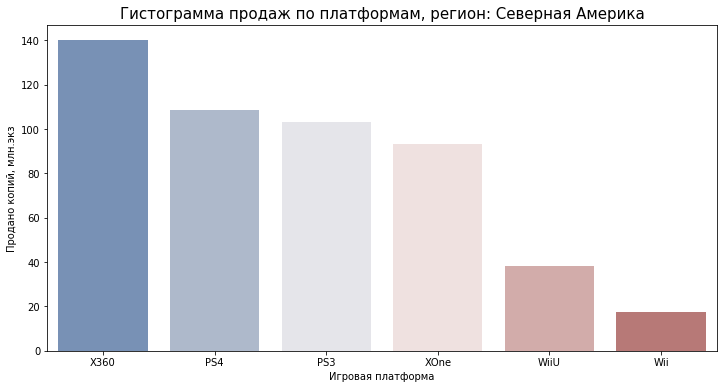

------------------------------------------------------------------------------------------------------------------

ТОП-5 жанров, регион: Северная Америка


,Игровой жанр,"Продано копий, млн.экз",% от общих продаж
0,Action,155.49,31.0
1,Shooter,138.87,27.7
2,Sports,79.54,15.9
3,Misc,35.43,7.1
4,Role-Playing,30.28,6.0


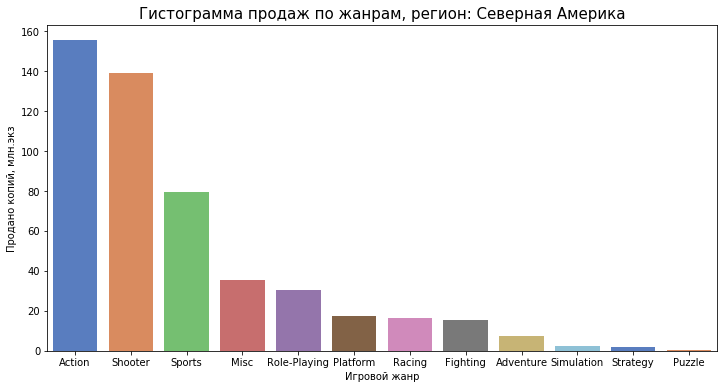

In [34]:
top5_platforms_and_genres('na_sales', 'game_platform', 'game_genre')

<div style="border:dotted black 3px; padding: 20px">
    
ТОП-5 платформ в Северной Америке: <i>X360, PS4, PS3, XOne, WiiU</i>.<br>
При этом доля продаж <i>PS4, PS3</i> практически равнозначна. <br><br>
    
ТОП-5 жанров игр в Северной Америке: <i>Action, Shooter, Sports, Misc, Role-Playing.</i><br>
Доля продаж жанров <i>Action</i> и <i>Shooter</i> незначительно отличается.<br>

</div>

### Европа: портрет пользователя


ТОП-5 игровых платформ, регион: Европа


,Игровая платформа,"Продано копий, млн.экз",% от общих продаж
0,PS4,141.09,34.3
1,PS3,106.86,26.0
2,X360,74.52,18.1
3,XOne,51.59,12.5
4,WiiU,25.13,6.1


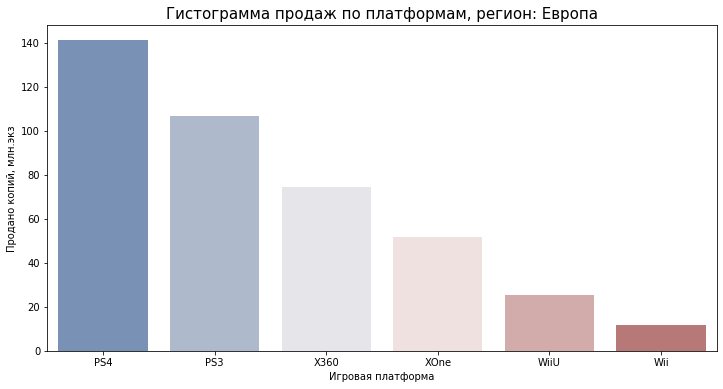

------------------------------------------------------------------------------------------------------------------

ТОП-5 жанров, регион: Европа


,Игровой жанр,"Продано копий, млн.экз",% от общих продаж
0,Action,137.46,33.4
1,Shooter,104.56,25.4
2,Sports,63.37,15.4
3,Racing,25.10,6.1
4,Role-Playing,24.44,5.9


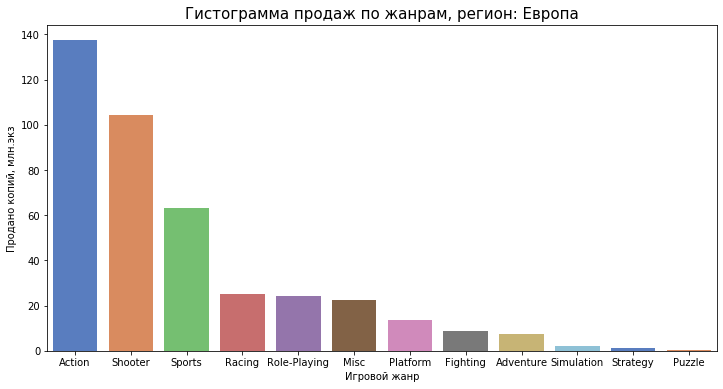

In [35]:
top5_platforms_and_genres('eu_sales', 'game_platform', 'game_genre')

<div style="border:dotted black 3px; padding: 20px">
    
ТОП-5 платформ в Европе: <i>PS4, PS3, X360, XOne, WiiU.</i> <br>
PS4 по объему продаж является явным лидером.<br><br>
    
ТОП-5 жанров игр в Европе: <i>Action, Shooter, Sports, Racing, Role-Playing.</i><br>
Жанр <i>Action</i> - лидирует по продажам. <br>

</div>

### Япония: портрет пользователя


ТОП-5 игровых платформ, регион: Япония


,Игровая платформа,"Продано копий, млн.экз",% от общих продаж
0,PS3,35.29,50.7
1,PS4,15.96,22.9
2,WiiU,13.01,18.7
3,Wii,3.39,4.9
4,X360,1.57,2.3


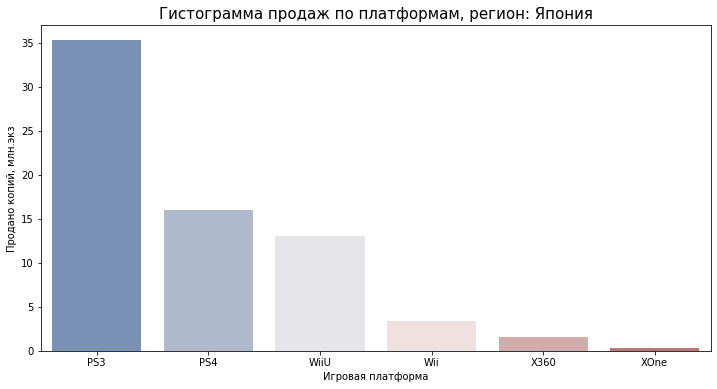

------------------------------------------------------------------------------------------------------------------

ТОП-5 жанров, регион: Япония


,Игровой жанр,"Продано копий, млн.экз",% от общих продаж
0,Action,21.96,31.6
1,Role-Playing,12.51,18.0
2,Shooter,9.05,13.0
3,Fighting,5.45,7.8
4,Misc,4.80,6.9


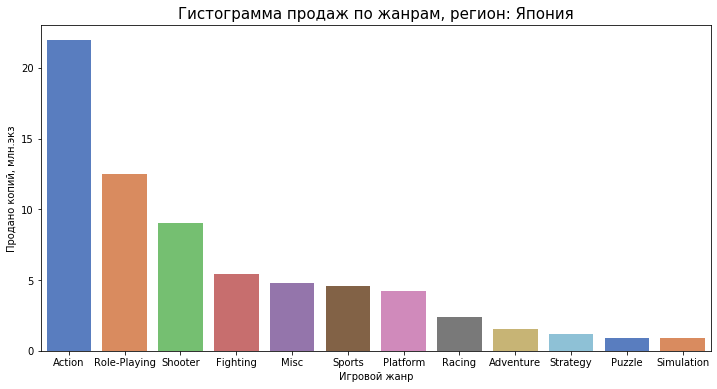

In [36]:
top5_platforms_and_genres('jp_sales', 'game_platform', 'game_genre')

<div style="border:dotted black 3px; padding: 20px">
    
ТОП-5 платформ в Японии: <i>PS3, PS4, WiiU, Wii, X360.</i><br>
50% от всех продаж занимает платформа PS3.<br><br>
    
ТОП-5 жанров игр в Японии: <i>Action, Role-Playing, Shooter, Fighting, Misc.</i><br>
Жанр <i>Action</i> - c отрывом лидирует по продажам.<br>
</div>

### Другие страны: портрет пользователя


ТОП-5 игровых платформ, регион: Другие страны


,Игровая платформа,"Продано копий, млн.экз",% от общих продаж
0,PS4,48.35,35.9
1,PS3,43.26,32.1
2,X360,20.40,15.1
3,XOne,14.27,10.6
4,WiiU,5.95,4.4


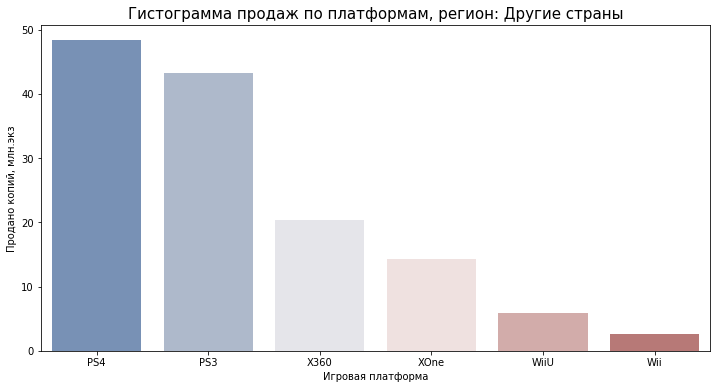

------------------------------------------------------------------------------------------------------------------

ТОП-5 жанров, регион: Другие страны


,Игровой жанр,"Продано копий, млн.экз",% от общих продаж
0,Action,45.67,33.9
1,Shooter,35.51,26.3
2,Sports,21.38,15.9
3,Role-Playing,8.68,6.4
4,Misc,6.80,5.0


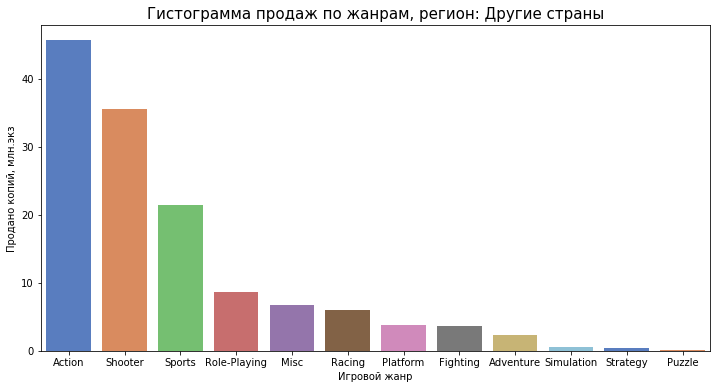

In [37]:
top5_platforms_and_genres('other_sales', 'game_platform', 'game_genre')

<div style="border:dotted black 3px; padding: 20px">
    
ТОП-5 платформ в других странах: <i>PS4, PS3, X360, XOne, WiiU.</i><br>
По объему продаж практически идентичны <i>PS4</i> и <i>PS3</i>.<br><br>
    
ТОП-5 жанров игр в других странах: <i>Action, Shooter, Sports, Role-Playing, Misc.</i><br>
Жанр <i>Action</i> - лидирует по продажам.<br>
    
</div>

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе по каждому из регионов мы определили ТОП-5 популярных платформ и ТОП-5 популярных игровых жанров. <br>
Мы выяснили, что:<br><br>

- В Северной Америке и Европе лидируют 3 одинаковые платформы (но с немного разными показателями продаж): PS4, PS3, X360. Эти же платформы лидируют и в остальных странах.<br>
- В Японии же 50% от общих продаж приходится на платформу PS3.<br>
- В Северной Америке и Европе лидируют 3 игровых жанра: Action, Shooter, Sports.<br>
- Жанр Action во всех регионах является лидером продаж.<br>
- По предпочтению жанров выделяется только Япония: в отличии от жанра-лидера продаж Action на 2-й позиции жанр Role-Playing. А также единственный жанр в ТОП-5 в Японии, который во всех остальных регионах отсутствует - это жанр Fighting.<br>
- Остальные популярные жанры во всех регионах (с разным расположением относительно продаж) - это Racing, Misc, Role-Playing.<br>
- Во всех регионах самые низкодоходные игровые 3 жанра: Puzzle, Strategy, Simulation.<br><br>
    
<i>Прим.:</i> портрет пользователя из 'Других стран' схож по показателям с портретом игровых предпочтений пользователя из Европы.<br>
    
</div>

## Изучение влияния ESRB-рейтинга на продажи в каждом из регионов

**Изучим влияет ли возрастной рейтинг организации ESRB на продажи в каждом из регионов.** В предобработке столбец `esrb_rating` имел пропуски, которые мы заменили строчным значением "not_defined" (не определен). 

In [38]:
# сгруппируем по рейтингу и подсчитаем для каждого региона суммарные продажи

esrb_region_sales = \
games_data_top_platforms.groupby('esrb_rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', \
                                                     'jp_sales': 'sum', 'other_sales': 'sum'}).reset_index()
print()
print('Объём продаж игр (по регионам) в зависимости от ESRB-рейтинга (в млн.экз.)')
display(esrb_region_sales)  # выведем на экран сгруппированную таблицу


Объём продаж игр (по регионам) в зависимости от ESRB-рейтинга (в млн.экз.)


,esrb_rating,na_sales,eu_sales,jp_sales,other_sales
0,E,94.17,90.05,11.17,26.74
1,E10+,64.89,45.07,4.01,13.82
2,M,214.76,173.64,17.76,58.58
3,T,54.81,41.44,13.86,14.95
4,not_defined,72.21,60.91,22.76,20.75


Теперь на основании этого датафрейма `esrb_region_sales` построим гистограммы продаж для каждого из представленных регионов. 

Установим ось `x` с названиями категорий рейтинга - единой для всех 4 регионов.

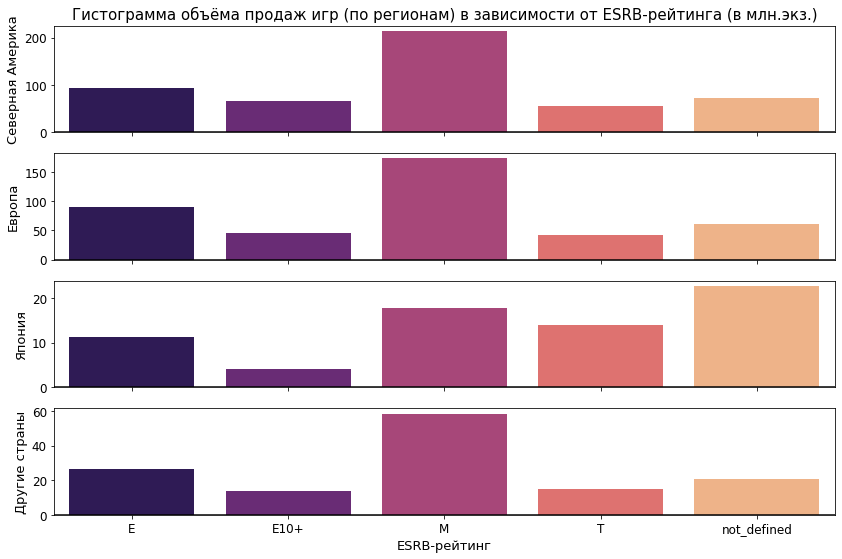

In [39]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 9), sharex=True)

# гистограмма для Севереной Америки

ax1.set_title('Гистограмма объёма продаж игр (по регионам) в зависимости от ESRB-рейтинга (в млн.экз.)', fontsize=15)  
x = esrb_region_sales['esrb_rating']
y1 = esrb_region_sales['na_sales']
sns.barplot(x=x, y=y1, ax=ax1, palette="magma")
ax1.axhline(0, color="k")
ax1.set_ylabel("Северная Америка", fontsize=13)
ax1.set_xlabel("")
ax1.tick_params(labelsize=12)

# гистограмма для Европы

y2 = esrb_region_sales['eu_sales']
sns.barplot(x=x, y=y2, ax=ax2, palette="magma")
ax2.axhline(0, color="k")
ax2.set_ylabel("Европа", fontsize=13)
ax2.set_xlabel("")
ax2.tick_params(labelsize=12)

# гистограмма для Японии

y3 = esrb_region_sales['jp_sales']
sns.barplot(x=x, y=y3, ax=ax3, palette="magma")
ax3.axhline(0, color="k")
ax3.set_ylabel("Япония", fontsize=13)
ax3.set_xlabel("")
ax3.tick_params(labelsize=12)

# гистограмма для Других стран

y4 = esrb_region_sales['other_sales']
sns.barplot(x=x, y=y4, ax=ax4, palette="magma")
ax4.axhline(0, color="k")
ax4.set_ylabel("Другие страны", fontsize=13)
ax4.set_xlabel("ESRB-рейтинг", fontsize=13)
ax4.tick_params(labelsize=12)


Дадим еще раз расшифровку ESRB-рейтинга.
- **Е** («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
- **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше».
- **M** («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- **T** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.

- **not_defined** — нет информации про возрастную группу.

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы выяснили какое влияние оказывает ворастной рейтинг ESRB на продажи (по регионам):<br><br>
- Игры с рейтингом <i>M (для взрослых от 18 лет)</i> во всех регионах наиболее продаваемые (здесь похоже больше связь с тем, что самые популярные жанры игр (как мы определили ранее) - это Action и Shooter, которые чаще всего как раз не рекомендуются подросткам).<br> На 2-ом месте - игры с рейтингом <i>E (для всех)</i>. На 3-ем - без определенного рейтинга.<br>
- Стоит отметить, что в Японии снова видно отличие от остальных регионов. <br> Объем продаж игр без маркировки возраста превосходит продажи игр всех остальных рейтингов. Данную особенность можно объяснить тем, что в Японии существует собственная государственная рейтинговая организация CERO, именно поэтому мы наблюдаем, что игры без рейтинга  - 1-ые по продажам, но это связано лишь с отсутствием у нас информации о прочих рейтингах помимо ESRB и сложно сделать вывод на основании такого рейтинга касаемо Японии.<br>
- А также игры с рейтингом <i>T (для подростков)</i> в Японии  наиболее продаваемые, чем с рейтингом <i>E (для всех)</i> в сравнении с другими странами, что также подтверждает иную картину данного распределения по сравнению с остальными регионами.<br>
    
</div>

## Проверка гипотез

### Гипотеза №1: о равенстве средних пользовательских рейтингов платформы *XOne* и платформы *PC*

**Сформулируем нулевую гипотезу H0:**

- **H0:** Средний пользовательский рейтинг платформы *XOne* равен среднему пользовательскому рейтингу платформы *PC*.

**Сформулируем альтернативную гипотезу H1:**

- **H1:** Средний пользовательский рейтинг платформы *XOne* отличается от среднего пользовательского рейтинга платформы *PC*.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод `scipy.stats.ttest_ind`. Для ttest-а будем использовать датафрейм `games_data_actual`, поскольку в последнем датафрейме `games_data_top_platforms` с топовыми платформами - платформа PC отсутствует.

Критический уровень статистической значимости установим  = 0.05 и считаем его допустимым, т.к. в нашей гипотезе мы проверяем равенство или отличие, и у нас нет информации от руководства интернет-магазина о возможных финансовых рисках, которые могли бы повлиять на наше решение снизить уровень значимости ниже 0.05.

In [40]:
# для корректной отработки кода при проверке гипотез избавимся от пропусков в столбце `user_rating`

games_data_actual = games_data_actual.dropna(subset=['user_rating'])

# делаем срезы по нужным платформам и выбираем 1 столбец с рейтингом `user_rating`

xone_rating = games_data_actual.query('game_platform == "XOne"')['user_rating']  
pc_rating = games_data_actual.query('game_platform == "PC"')['user_rating']

# определим дисперсии, чтобы понять какое значение параметра `equal_var` использовать в `ttest`

xone_var = np.var(xone_rating, ddof=1)
pc_var = np.var(pc_rating, ddof=1)
print('Дисперсия "xone_rating"=', xone_var)
print('Дисперсия "pc_rating"=', pc_var)

Дисперсия "xone_rating"= 1.9069968429360695
Дисперсия "pc_rating"= 2.770443997158418


In [41]:
alpha = 0.05
results = st.ttest_ind(xone_rating, pc_rating, equal_var = False) # False, т.к. дисперсии совокупностей разные
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


<div style="border:dotted black 3px; padding: 20px">
    
Таким образом, нет оснований отвергать <i>H0</i> и с вероятностью 55% средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC.
    
</div>

### Гипотеза №2: о различии пользовательских рейтингов жанра *Action* и жанра *Sports*

**Сформулируем нулевую гипотезу H0:**

- **H0:** Средний пользовательский рейтинг жанра *Action* равен среднему пользовательскому рейтингу жанра *Sports*.

**Сформулируем альтернативную гипотезу H1:**

- **H1:** Средний пользовательский рейтинг жанра *Action* отличается от среднего пользовательского рейтинга жанра *Sports*.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод `scipy.stats.ttest_ind`. Для ttest-а будем использовать также датафрейм `games_data_actual`, поскольку выборка - благодаря большему числу платформ - больше, чем в последнем датафрейме `games_data_top_platforms`.

Критический уровень статистической значимости установим = 0.05 и считаем его допустимым, т.к. в нашей гипотезе (как и в 1-ой гипотезе) мы проверяем равенство или отличие, и у нас нет информации от руководства интернет-магазина о возможных финансовых рисках, которые могли бы повлиять на наше решение снизить уровень значимости ниже 0.05.

In [42]:
# делаем срезы по нужным жанрам и выбираем 1 столбец с рейтингом `user_rating`

action_rating = games_data_actual.query('game_genre == "Action"')['user_rating']  
sports_rating = games_data_actual.query('game_genre == "Sports"')['user_rating']

# определим дисперсии, чтобы понять какое значение параметра `equal_var` использовать в `ttest`

action_var = np.var(action_rating, ddof=1)
sports_var = np.var(sports_rating, ddof=1)
print('Дисперсия "action_rating"=', action_var)
print('Дисперсия "sports_rating"=', sports_var)

Дисперсия "action_rating"= 1.8890840494348111
Дисперсия "sports_rating"= 3.022890298704732


In [43]:
alpha = 0.05
results = st.ttest_ind(action_rating, sports_rating, equal_var = False)  # False, т.к. дисперсии совокупностей разные
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


<div style="border:dotted black 3px; padding: 20px">

Таким образом, мы отвергаем <i>H0</i> и принимаем альтернативную <i>H1</i>: средний пользовательский рейтинг жанра Action отличается от среднего пользовательского рейтинга жанра Sports.
    
</div>

### Вывод

<div style="border:solid black 2px; padding: 20px">
    
На данном этапе мы проверили 2 гипотезы и определили, что:<br><br>
- Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC. <br>
- Средний пользовательский рейтинг жанра Action отличается от среднего пользовательского рейтинга жанра Sports.<br>

</div>

## Общий вывод

<div style="border: ridge black 3px; padding: 25px">
<b>По результатам проведенного исследования по изучению и выявлению факторов, влияющих на успешность и популярность (высокие продажи) компьютерных игр в прогнозе на 2017 г. мы выделили разные закономерности (платформы, жанры) для каждого из регионов, на которые следует обратить внимание при оганизации рекламной кампании по продвижению игр на 2017 г.</b><br><br>
    
<b>Северная Америка:</b><br>
1. ТОП-5 платформ (по убыванию популярности): X360, PS4, PS3, XOne, Wii.<br>
2. ТОП-5 жанров игр (по убыванию популярности): Action, Shooter, Sports, Misc, Role-Playing.<br>
Прим.: у платформы X360 возможен спад продаж, т.к. выявлена тенденция на сокращение продаж.<br><br>

<b>Европа:</b><br>
1. ТОП-5 платформ в Европе (по убыванию популярности): PS4, PS3, X360, XOne, WiiU.<br>
2. ТОП-5 жанров игр (по убыванию популярности): Action, Shooter, Sports, Racing, Role-Playing.<br><br>
   
<b>Япония:</b><br>
1. ТОП-5 платформ (по убыванию популярности): PS3, PS4, WiiU, Wii, X360.<br>
Прим.: у платформы PS3 возможен спад продаж, т.к. выявлена тенденция на сокращение продаж, но 50% от всех продаж за период 2012 г. - 2016 г. занимает платформа PS3.<br>
2. ТОП-5 жанров игр (по убыванию популярности): Action, Role-Playing, Shooter, Fighting, Misc.<br>
3. Для определения влияния возрастного рейтинга на продажи игр в Японии целесообразно изучать рейтинг CERO, т.к. из-за недостающих данных рейтинга ESRB сложно сделать вывод о влиянии возрастных рейтингов на продажи .<br><br>
    
<b>Другие страны:</b><br>
1. ТОП-5 платформ (по убыванию популярности): PS4, PS3, X360, XOne, WiiU. <br>
2. ТОП-5 жанров игр (по убыванию популярности): Action, Shooter, Sports, Role-Playing, Misc.<br><br>
    
<b>Для всех регионов характерно:</b><br>

- Самые низкодоходные жанры: Puzzle, Strategy, Simulation.<br>
- Перспективные платформы с хорошим объемом продаж и с тенденцией к росту, появившиеся в 2013 г.: PS4, XOne.<br>
- Платформы с хорошим объемом продаж, но с тенденцией на спад продаж: PS3, X360.<br>
- Применительно к каждой из популярных платформ отслеживается небольшая положительная корреляция оценочного рейтинга критиков и объемов продаж игр.<br>
- Корреляция оценочного рейтинга пользователей и объемов продаж игр - отсутствует.<br>
- Игры с ESRB-рейтингом M ("для взрослых") наиболее популярны, но взаимосвязь больше с высокой популярностью игр в жанрах Action, Shooter, которые чаще всего не рекомендуется для подростков и детей.<br>

    
</div>